## Oppgavetekst
Lag en lineær modell som predikerer alder (i dager) ut fra lengde og vekt gitt
observasjonene i day_length_weight.csv

In [80]:
import torch # use torch.tensor instead of np.array
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipympl

In [81]:
data = pd.read_csv("day_length_weight.csv")

length = data['length']
weight = data['weight']

tensor_length = torch.FloatTensor(length.values)
tensor_weight = torch.FloatTensor(weight.values)

x_train = torch.stack((tensor_length, tensor_weight), dim=1)

y_train = torch.tensor(data["# day"]).reshape(-1, 1)

print(x_train)

tensor([[84.8655, 13.0302],
        [92.8221, 14.7191],
        [98.5218, 21.0195],
        ...,
        [72.6863,  9.7797],
        [98.4318, 16.2862],
        [71.6968,  9.2139]])


In [82]:
class LinearRegressionModel:

    def __init__(self):
        #Model variables
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)

    def f(self, x):
        return x @ self.W + self.b

    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y) # Bruker heller denne for litt bedre W- og b-verdier
        #return torch.mean(torch.square(self.f(x) - y))

In [83]:
model = LinearRegressionModel()

#Optimize: adjust W and b to minimize loss using Stochastic Gradient Descent(SGD)
optimizer = torch.optim.SGD([model.W, model.b], 0.0001)
for epoch in range(100000):
    model.loss(x_train, y_train).backward() #Compute loss gradients
    optimizer.step() #Optimizes by adjusting W and b
    #similiar to model.W -= model.W.grad * 0.01 (and same for b)

    optimizer.zero_grad() #Clear gradients for next step

In [84]:
# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[ 6.1369],
        [76.9974]], requires_grad=True), b = tensor([[-599.3589]], dtype=torch.float64, requires_grad=True), loss = tensor(55015.3933, dtype=torch.float64, grad_fn=<MseLossBackward0>)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (200x200 and 2x1)

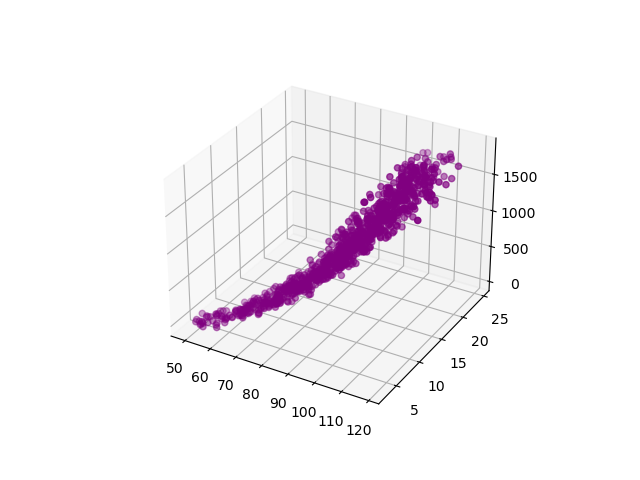

In [145]:
#Visualisering
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')  # 3D plots require a subplot with 3D projection enabled

# Plot 3 random points (might need to convert to numpy array to avoid error...)
#ax.plot(tensor_length.numpy(), tensor_weight.numpy(), y_train.numpy(), 'o')
ax.scatter3D(tensor_length.numpy(), tensor_weight.numpy(), y_train.numpy(), color="purple")

# Surface plot of x * x + y * y
# Create x and y matrices that will be used by the drawing function instead of a for-loop like:
# for y in torch.arange(start=0., end=1., step=0.01):
#     for x in torch.arange(start=0., end=1., step=0.01):
#         #  draw point at x, y, x * x + y * y
x = torch.arange(start=0., end=100., step=0.5)  # Create the vector [0., 0.01, ..., 0.99]
x = x.expand(x.shape[0], -1)  # Create the square matrix [[0., 0.01, ..., 0.99], ..., [0., 0.01, ..., 0.99]]
y = x.T  # Transpose of x: [[0., ..., 0.], [0.01, ..., 0.01], ... [0.99, ..., 0.99]]

ax.plot_wireframe(x.numpy(), y.numpy(), model.f(x).detach(), label="$f(x) = xW+b$")  # * and + are element-wise operators resulting in a matrix with the same shape as x and y

ax.set_xlabel('$x$')  # $$ activates LaTeX math notation
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.legend()
plt.show()
